In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
import pandas as pd
import os

combined_df = pd.read_csv('C:/Users/gnssl/OneDrive/Documents/GitHub/2023_Winter_AI_Study/dataset/CIC-IDS2017/MachineLearningCVE/combISCX.csv')


In [4]:
label_df=pd.read_csv('C:/Users/gnssl/OneDrive/Documents/GitHub/2023_Winter_AI_Study/dataset/CIC-IDS2017/TrafficLabelling_/labelISCX.csv')


C:\Users\gnssl\AppData\Local\Temp\ipykernel_28300\2374282876.py:1: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  label_df=pd.read_csv('C:/Users/gnssl/OneDrive/Documents/GitHub/2023_Winter_AI_Study/dataset/CIC-IDS2017/TrafficLabelling_/labelISCX.csv')


In [5]:
combined_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
combined_df[" Label"].value_counts().sum()

2830743

In [7]:
print(combined_df.columns[combined_df.isna().any()])

Index(['Flow Bytes/s'], dtype='object')


In [8]:
null_columns = combined_df.columns[combined_df.isnull().any()].tolist()
print(null_columns)

['Flow Bytes/s']


In [9]:
combined_df["Flow Bytes/s"].isnull().sum()

1358

In [10]:
combined_df["Flow Bytes/s"].value_counts()

Flow Bytes/s
0.000000e+00    355767
4.000000e+06     24991
1.333333e+06     10096
3.000000e+06      9682
8.333333e+04      8884
                 ...  
7.116893e+04         1
1.070531e+04         1
1.287347e+04         1
7.729267e+03         1
4.360695e+03         1
Name: count, Length: 1593908, dtype: int64

In [11]:
combined_df["Flow Bytes/s"] = combined_df["Flow Bytes/s"].fillna(combined_df["Flow Bytes/s"].mean())

In [12]:
combined_df["Flow Bytes/s"].isnull().sum()

0

In [13]:
for column in combined_df.columns:
    if combined_df[column].dtype != 'int64':
        if column != " Label":
            combined_df[column]= combined_df[column].astype(np.float64)
for column in combined_df.columns:
    if combined_df[column].dtype == np.float64:
        combined_df[column] = tf.convert_to_tensor(combined_df[column].values, dtype=tf.float64)


In [14]:
combined_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [15]:
unique_labels = combined_df[' Label'].unique()
num_classes = len(unique_labels)
print(num_classes)

15


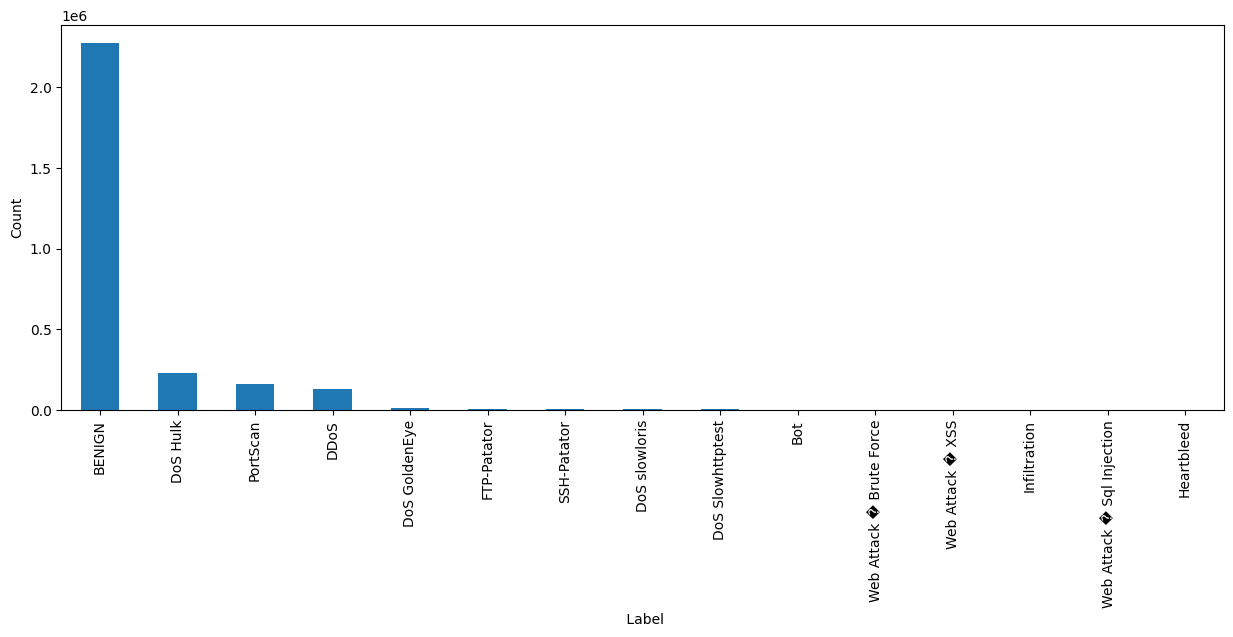

In [16]:
plt.figure(figsize=(15, 5))

plt.xlabel('Label')
plt.ylabel('Count')
combined_df[' Label'].value_counts().plot(kind='bar',)
plt.show()


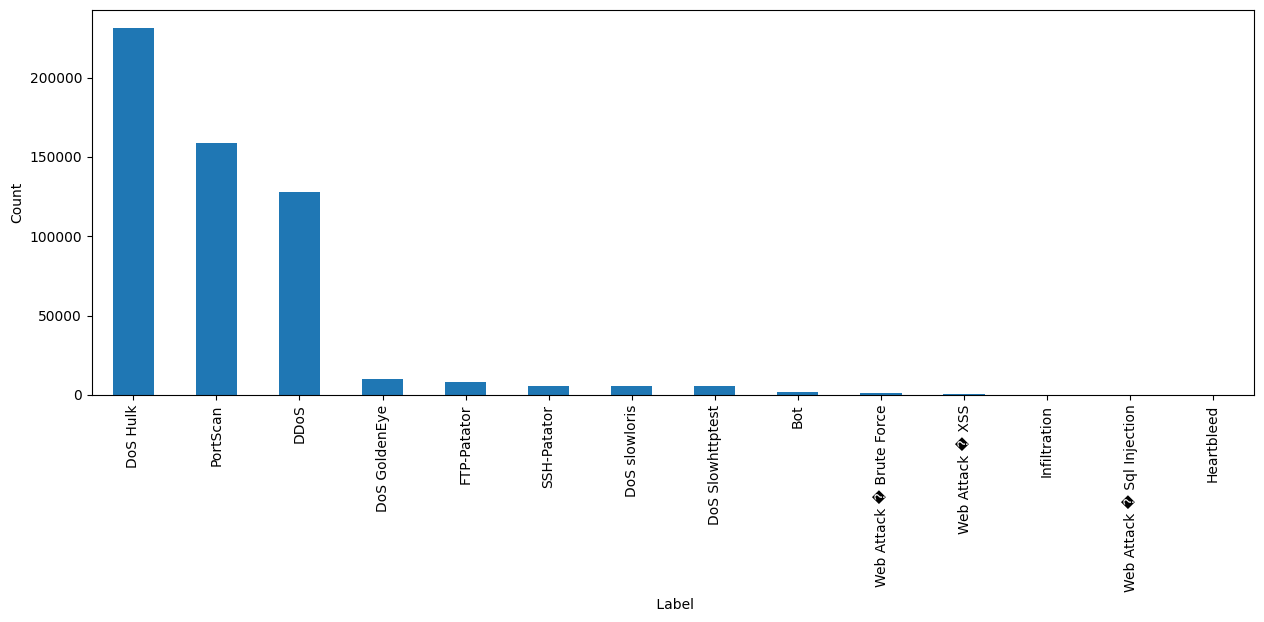

In [17]:
#BENIGN 값제외
plt.figure(figsize=(15, 5))

plt.xlabel('Label')
plt.ylabel('Count')
plt_df = combined_df[combined_df[' Label'] != 'BENIGN']
plt_df[' Label'].value_counts().plot(kind='bar',)
plt.show()


 CNN, LSTM, GRU

In [18]:
X=combined_df.drop(' Label',axis=1)
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [19]:
y=combined_df[' Label']
y.value_counts()

 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [21]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [22]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

In [23]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
threshold = 1e8  # 예시 임계값
X_train = np.clip(X_train, -threshold, threshold)
X_test = np.clip(X_test, -threshold, threshold)

scaler = RobustScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   


(2547664, 5, 78) (2547664,)
(283071, 5, 78) (283071,)


In [25]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

X_train = tf.constant(X_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)
y_train_onehot = tf.constant(y_train_onehot, dtype=tf.float32)
y_test_onehot = tf.constant(y_test_onehot, dtype=tf.float32)

In [26]:
print(y_train_onehot)

tf.Tensor(
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]], shape=(2547664, 15), dtype=float32)


In [27]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 

(2547664, 5, 78) (2547664,)
(283071, 5, 78) (283071,)


In [28]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv1D, Input, Dense, Flatten, Dropout


In [29]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [30]:
input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer) 
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
dens1 = Dense(32, activation= "tanh")(dens)
dens2 = Dense(16, activation="tanh")(dens1)
outputs = Dense(15, activation = "softmax")(dens2)

learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model = keras.Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 78)]           0         
                                                                 
 conv1d (Conv1D)             (None, 3, 64)             15040     
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 64)                12352     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 15)                255   

In [31]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)


Epoch 1/30
71654/71654 [==============================] - 87s 1ms/step - loss: nan - accuracy: 0.8029 - val_loss: nan - val_accuracy: 0.8026
Epoch 2/30
71654/71654 [==============================] - 90s 1ms/step - loss: nan - accuracy: 0.8030 - val_loss: nan - val_accuracy: 0.8026
Epoch 3/30
71654/71654 [==============================] - 85s 1ms/step - loss: nan - accuracy: 0.8030 - val_loss: nan - val_accuracy: 0.8026
Epoch 4/30
71654/71654 [==============================] - 90s 1ms/step - loss: nan - accuracy: 0.8030 - val_loss: nan - val_accuracy: 0.8026
Epoch 5/30
71654/71654 [==============================] - 90s 1ms/step - loss: nan - accuracy: 0.8030 - val_loss: nan - val_accuracy: 0.8026
Epoch 6/30
71654/71654 [==============================] - 88s 1ms/step - loss: nan - accuracy: 0.8030 - val_loss: nan - val_accuracy: 0.8026
Epoch 7/30
71654/71654 [==============================] - 92s 1ms/step - loss: nan - accuracy: 0.8030 - val_loss: nan - val_accuracy: 0.8026
Epoch 8/30
71

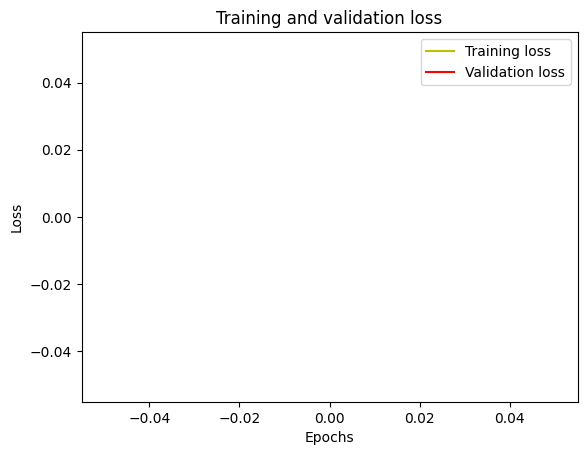

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

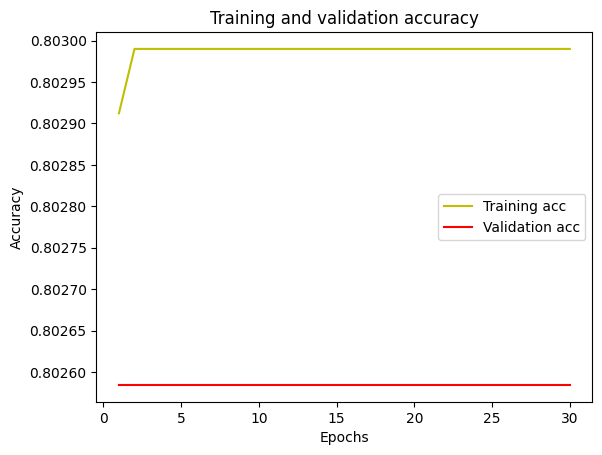

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

8846/8846 [==============================] - 7s 765us/step


In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89    227445
           1       0.00      0.00      0.00       208
           2       0.00      0.00      0.00     12852
           3       0.00      0.00      0.00      1015
           4       0.00      0.00      0.00     23075
           5       0.00      0.00      0.00       506
           6       0.00      0.00      0.00       578
           7       0.00      0.00      0.00       786
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00     15781
          11       0.00      0.00      0.00       598
          12       0.00      0.00      0.00       158
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00        61

    accuracy                           0.80    283071
   macro avg       0.05      0.07      0.06    283071
weighted avg       0.65   

C:\Users\gnssl\anaconda3\envs\tenvenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gnssl\anaconda3\envs\tenvenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gnssl\anaconda3\envs\tenvenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
